In [8]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
from scipy import optimize as opt

# Setup

Consider the following 1st-order ordinary differential equation given by

\begin{equation*}
\frac{dx}{dt} = -x
\end{equation*}

since this equation is seperable we can get,

\begin{equation*}
\frac{dx}{x} = -dt
\end{equation*}

integrating both sides we have,

\begin{align*}

\int \frac{dx}{x} &= -\int dt\\
\log{x} &= -t + C
\end{align*}

raising both sides by $e$ gives us,

\begin{equation*}
x = Ae^{-t}
\end{equation*}

where $A = e^C$. Below we have the plot for our solution where $A = 10$,

In [3]:
# setup independent and dependent variables
t = np.linspace(0,10, 100)
x = 10*np.exp(-t)

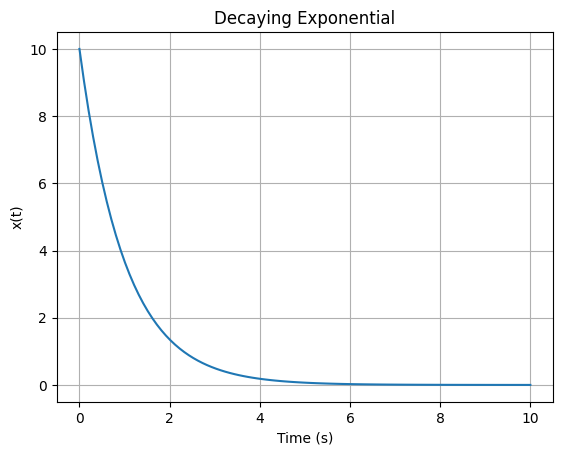

In [4]:
# plot the data
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('x(t)')
plt.title('Decaying Exponential')
plt.grid()
plt.show()

# Using Least-Squares Regression
Now suppose we didn't know the ODE ahead of time and instead was only given discrete information from our system,

\begin{equation*}
\vec{\frac{dx}{dt}} = \left[\frac{dx}{dt}_1, \dots, \frac{dx}{dt}_n \right]
\end{equation*}

first assuming that our differential can be expressed as,

\begin{equation*}
\frac{dx}{dt} = c_1 f_1(x) + c_2 f_2(x) + \dots + c_m f_m(x)
\end{equation*}
or,
\begin{equation*}
\vec{\frac{dx}{dt}} = \bold{F}\vec{c}
\end{equation*}

then one approach we could try is to construct a library of "basis" functions, $\bold{F}$, and use Least-Squares Regression to solve for the coefficients $\vec{c}$, that is

\begin{equation*}
\vec{c} = \left(\bold{F}^T\bold{F}\right)^{-1} \bold{F}^T \vec{\frac{dx}{dt}}
\end{equation*}

In [5]:
# set error threshold for the least squares solution
epsilon = 1e-10

# discrete time steps
x = 10*np.exp(-t)

# compute ODE at time discretized time steps
x_dot = -1*x

# create basis functions

one = np.ones(len(t))
x = 10*np.exp(-t)
x_2 = x**2
x_3 = x**3
x_4 = x**4
x_5 = x**5

# create function matrix F
F = np.column_stack((one, x, x_2, x_3, x_4, x_5))

# solve for the coefficients
a = np.linalg.lstsq(F, x_dot, rcond=None)[0]

# remove values less then the alloted error threshold
a[abs(a) < epsilon] = 0

# print solution
one, x1, x2, x3, x4, x5 = sp.symbols('1 x1 x2 x3 x4 x5')
F_sym = sp.Matrix([one, x1, x2, x3, x4, x5])
a_sym = sp.Matrix(a)

# print the solution
print('x_diff = ' + str((F_sym.T * a_sym)[0]))



x_diff = -1.00000000000204*x1


# Real-Life Data

Unfortunately, unlike the example above the data will not be as nice(namely since we don't know the differential equation) and hence may need to approximate it indirectly, such as using Forward Difference. That is if we are given a series of time-series data we can compute,

\begin{equation*}
\hat{\frac{dx}{dt}} = \left[\frac{x(t_1+h) - x(t_1)}{h}, \frac{x(t_2+h) - x(t_2)}{h}, \dots\right]
\end{equation*}

In [6]:
# generate time series data
t = np.linspace(0,10, 10000000) # 0 <= t <= 10

delta_t = t[1] - t[0] # time step

x = 10*np.exp(-t) # x = 10e^(-t)

# add noise to the data

# randomly select points in data
indices = np.random.choice(range(len(t)), 10, replace=False)

# add noise to the selected points
x[indices] = x[indices] + np.random.normal(0, 0.1, len(indices))


# approximate the derivative using forward-difference
x_dot = [(x[i+1] - x[i])/delta_t for i in range(len(t)-1)]

# create basis functions
one = np.ones(len(t)-1)
x = 10*np.exp(-t[:-1])
x_2 = x**2
x_3 = x**3
x_4 = x**4
x_5 = x**5

# create function matrix F
F = np.column_stack((one, x, x_2, x_3, x_4, x_5))

# solve for the coefficients
a = np.linalg.lstsq(F, x_dot, rcond=None)[0]

# set error threshold
epsilon = 1e-5

# remove values less then the alloted error threshold
a[abs(a) < epsilon] = 0

# print solution
one, x1, x2, x3, x4, x5 = sp.symbols('1 x1 x2 x3 x4 x5')
F_sym = sp.Matrix([one, x1, x2, x3, x4, x5])
a_sym = sp.Matrix(a)

# print the solution
print('x_diff = ' + str((F_sym.T * a_sym)[0]))


x_diff = -0.999999448036959*x1


x_diff = 0.00133549921566171*1 - 1.02310007899736*x1 + 0.0829179289351765*x2 - 0.0265249785500835*x3 + 0.00323417208108735*x4 - 0.00013407580270175*x5
x_diff = 0.000493672141652662*1 - 1.00417778443717*x1 + 0.00925818586827866*x2 - 0.00277643290453439*x3 + 0.000322506565137617*x4 - 1.28483329212559e-5*x5
x_diff = -5.03986977227728e-5*1 - 0.998625991235647*x1 - 0.00107730743314296*x2 + 0.00037750727316143*x3 - 4.94528435286828e-5*x4
x_diff = -0.999875560277938*x1 - 8.89339176634888e-5*x2 + 3.00272886241057e-5*x3
x_diff = -0.999996680296963*x1
x_diff = -0.999999158532701*x1


Text(0.5, 1.0, 'Error vs. Resolution')

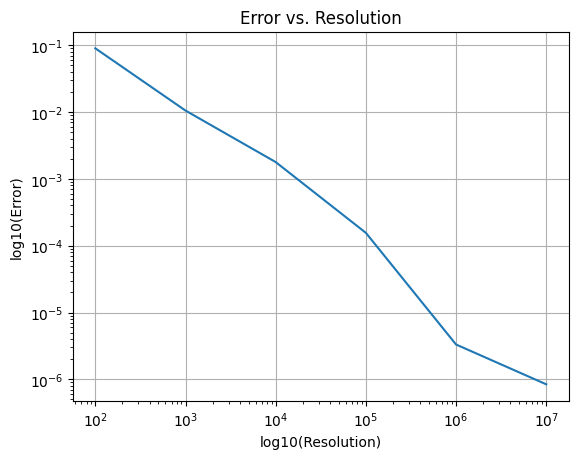

In [13]:

resolution = [100,1000,10000,100000,1000000,10000000]
error = []
for res in resolution:
    t = np.linspace(0,10, res) # 0 <= t <= 10

    delta_t = t[1] - t[0] # time step

    x = 10*np.exp(-t) # x = 10e^(-t)

    # add noise to the data

    # randomly select points in data
    indices = np.random.choice(range(len(t)), 10, replace=False)

    # add noise to the selected points
    x[indices] = x[indices] + np.random.normal(0, 0.1, len(indices))


    # approximate the derivative using forward-difference
    x_dot = [(x[i+1] - x[i])/delta_t for i in range(len(t)-1)]

    # create basis functions
    one = np.ones(len(t)-1)
    x = 10*np.exp(-t[:-1])
    x_2 = x**2
    x_3 = x**3
    x_4 = x**4
    x_5 = x**5

    # create function matrix F
    F = np.column_stack((one, x, x_2, x_3, x_4, x_5))

    # solve for the coefficients
    a = np.linalg.lstsq(F, x_dot, rcond=None)[0]

    # set error threshold
    epsilon = 1e-5

    # remove values less then the alloted error threshold
    a[abs(a) < epsilon] = 0

    # print solution
    one, x1, x2, x3, x4, x5 = sp.symbols('1 x1 x2 x3 x4 x5')
    F_sym = sp.Matrix([one, x1, x2, x3, x4, x5])
    a_sym = sp.Matrix(a)

    # print the solution
    print('x_diff = ' + str((F_sym.T * a_sym)[0]))
    error.append(np.linalg.norm(np.array([0, -1, 0, 0,0, 0]) - a))
# plot the error

x = resolution
y = error
plt.grid()
plt.plot(x, y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log10(Resolution)')
plt.ylabel('log10(Error)')
plt.title('Error vs. Resolution')

[-9.23798257e+00  8.02223367e+00 -2.84428199e+00  4.97704478e-01
 -4.22920841e-02  1.38855434e-03]
x_diff = -9.23798256520184*1 + 8.02223367116972*x1 - 2.84428199341974*x2 + 0.497704478372876*x3 - 0.0422920840657561*x4 + 0.00138855433939019*x5
[-9.62585718e+00  8.33610334e+00 -2.94326956e+00  5.12020340e-01
 -4.32143903e-02  1.40897893e-03]
x_diff = -9.62585717934038*1 + 8.33610334263423*x1 - 2.94326955859014*x2 + 0.512020339769597*x3 - 0.0432143902604756*x4 + 0.00140897893486884*x5
[-9.65845280e+00  8.34610753e+00 -2.93796358e+00  5.09366009e-01
 -4.28389315e-02  1.39181591e-03]
x_diff = -9.65845280120723*1 + 8.34610752823784*x1 - 2.93796357791535*x2 + 0.509366008750906*x3 - 0.042838931481293*x4 + 0.0013918159119368*x5
[-9.66212214e+00  8.34863345e+00 -2.93857165e+00  5.09418052e-01
 -4.28387551e-02  1.39166610e-03]
x_diff = -9.66212214070847*1 + 8.34863344507652*x1 - 2.9385716516868*x2 + 0.509418051848354*x3 - 0.0428387550870282*x4 + 0.00139166609603903*x5
[-9.66253647e+00  8.3490202

Text(0.5, 1.0, 'Error vs. Resolution')

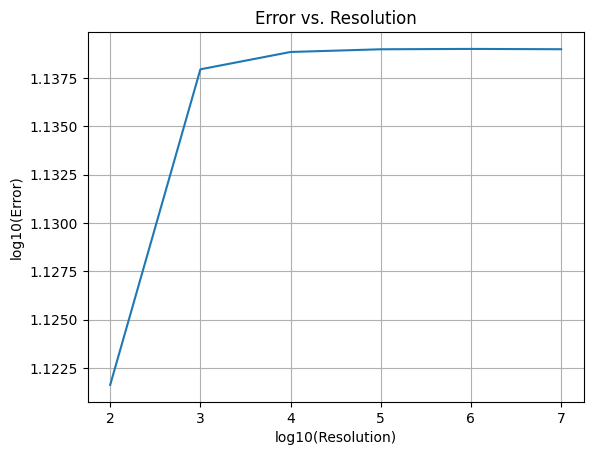

In [12]:

resolution = [100,1000,10000,100000,1000000,10000000]
error = []
for res in resolution:
    t = np.linspace(0,10, res) # 0 <= t <= 10

    delta_t = t[1] - t[0] # time step

    x = 10*np.exp(-t) # x = 10e^(-t)

    # add noise to the data

    # randomly select points in data
    indices = np.random.choice(range(len(t)), 10, replace=False)

    # add noise to the selected points
    x[indices] = x[indices] + np.random.normal(0, 0.1, len(indices))


    # approximate the derivative using forward-difference
    x_dot = [(x[i+1] - x[i])/delta_t for i in range(len(t)-1)]

    # create basis functions
    one = np.ones(len(t)-1)
    x = 10*np.exp(-t[:-1])
    x_2 = x**2
    x_3 = x**3
    x_4 = x**4
    x_5 = x**5

    # create function matrix F
    F = np.column_stack((one, x, x_2, x_3, x_4, x_5))

    # solve for the coefficients

    
    # set error threshold
    epsilon = 1e-5

    # remove values less then the alloted error threshold
    a[abs(a) < epsilon] = 0

    # print solution
    one, x1, x2, x3, x4, x5 = sp.symbols('1 x1 x2 x3 x4 x5')
    F_sym = sp.Matrix([one, x1, x2, x3, x4, x5])
    a_sym = sp.Matrix(a)

    # print the solution
    print('x_diff = ' + str((F_sym.T * a_sym)[0]))
    error.append(np.linalg.norm(np.array([0, -1, 0, 0,0, 0]) - a))
# plot the error

x = np.log10(resolution)
y = np.log10(error)
plt.grid()
plt.plot(x, y)
plt.xlabel('log10(Resolution)')
plt.ylabel('log10(Error)')
plt.title('Error vs. Resolution')

# 